<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Seyed Hamid Ghasemi

**Student ID**: 400109768



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [146]:
## Import necessary libraries here ##
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV



**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [3]:
## Write your code here ##

# Load the CSV file into a DataFrame
boston = pd.read_csv('Q1/Boston.csv')

# Print the first few rows of the DataFrame
print("boston head:")
print(boston.head())
print()

# Print the shape of the DataFrame
print("boston shape:")
print(boston.shape)

boston head:
      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

boston shape:
(506, 14)


First, based on the following link, I will give an explanation about the Boston dataset:
**<font color='blue'>https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html</font>**

-Origin
The origin of the boston housing data is Natural.

-Usage
This dataset may be used for Assessment.

-Number of Cases
The dataset contains a total of 506 cases.

-Order
The order of the cases is mysterious.

-Variables
There are 14 attributes in each case of the dataset. They are:

CRIM: per capita crime rate by town
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town.
CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX: nitric oxides concentration (parts per 10 million)
RM: average number of rooms per dwelling
AGE: proportion of owner-occupied units built prior to 1940
DIS: weighted distances to five Boston employment centres
RAD: index of accessibility to radial highways
TAX: full-value property-tax rate per $10,000.
PTRATIO: pupil-teacher ratio by town
B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT: % lower status of the population
MEDV: Median value of owner-occupied homes in 1000 dollars.


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [38]:
## Write your code here ##


# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(boston.drop('MEDV', axis=1), boston['MEDV'], test_size=0.2, random_state=42)

#print(y_train.shape)

# Train a linear regression model using all of the features
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate the R^2 score for the training and testing sets
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Calculate the RMSE for the training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

# Print the R^2 scores and RMSE values
print("Training R^2 score: {:.2f}".format(train_score))
print("Testing R^2 score: {:.2f}".format(test_score))
print("Training RMSE: {:.2f}".format(train_rmse))
print("Testing RMSE: {:.2f}".format(test_rmse))
print()

# Print the coefficients
print("Model coefficients:")
for i in range(len(model.coef_)):
   print(boston.columns[i],":","{:.3f}".format(model.coef_[i]))
print("Intercept:", "{:.3f}".format(model.intercept_))

Training R^2 score: 0.75
Testing R^2 score: 0.67
Training RMSE: 4.65
Testing RMSE: 4.93

Model coefficients:
CRIM : -0.113
ZN : 0.030
INDUS : 0.040
CHAS : 2.784
NX : -17.203
RM : 4.439
AGE : -0.006
DIS : -1.448
RAD : 0.262
TAX : -0.011
PTRATIO : -0.915
B : 0.012
LSTAT : -0.509
Intercept: 30.247


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10**np.linspace (3,-3,100) *0.5$$

**<font color='green'> treshold : max(abs(coefs))/150 </font>**



In [190]:
# Set the alphas parameter
alphas = 10**np.linspace(3, -3, 100) * 0.5

# Initialize lists to store results
train_mse = []
test_mse = []
coefficients = []
not_considered_features = []

# Train Ridge Regression models for each alpha
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Calculate MSE for train and test sets
    train_mse.append(mean_squared_error(y_train, model.predict(X_train), squared=False))
    test_mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))

    # Store coefficients
    coefficients.append(model.coef_)

    # Count number of not-considered features (features with coefficient close to zero)
    not_considered_features.append(np.sum(np.abs(model.coef_) < np.max(np.abs(model.coef_))/150))

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

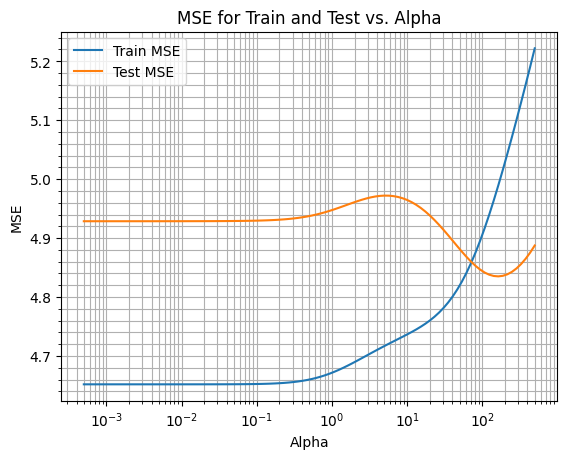

In [191]:
## Write your code here ##
# Plot MSE for train and test versus alpha
plt.plot(alphas, train_mse, label='Train MSE')
plt.plot(alphas, test_mse, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.title('MSE for Train and Test vs. Alpha')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()

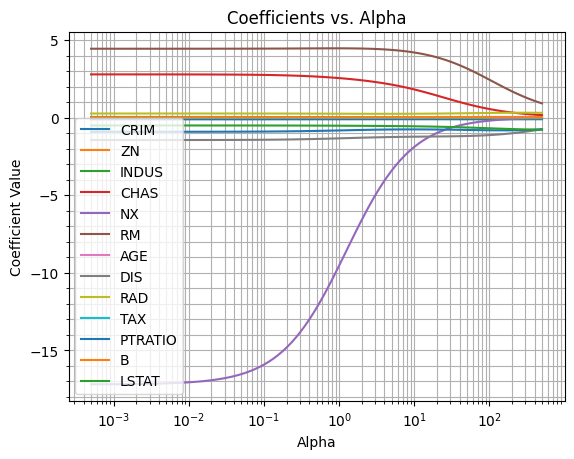

In [192]:
# Plot coefficients versus alpha
for i in range(np.shape(coefficients)[1]):
    coeff_i = []
    for j in range(np.shape(coefficients)[0]):
        coeff_i.append(coefficients[j][i])
    plt.plot(alphas, coeff_i,label=boston.columns[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Alpha')
plt.xscale('log')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()
plt.show()

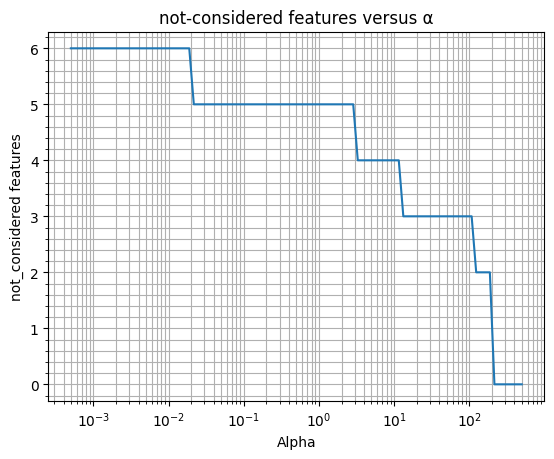

In [193]:
# Plot Number of not-considered features versus α
plt.plot(alphas, not_considered_features)
plt.xlabel('Alpha')
plt.ylabel('not_considered features')
plt.title('not-considered features versus α')
plt.xscale('log')
plt.grid(which='both')
plt.minorticks_on()

**<font color='green'> Finally select the optimal value of α. Report MSE, R^2 and coefficients.Compare this case with the linear regression case. </font>**

The optimal value of alpha in ridge regression can be found by testing different values of alpha to find a balance between the bias-variance trade-off. This can be done by using cross-validation to measure the error of the model with different values of alpha, and then selecting the value that results in the smallest error.

In [196]:
# Use RidgeCV() to find the optimal value of alpha
ridgecv = RidgeCV(alphas=alphas, cv=10)
ridgecv.fit(X_train, y_train)

# Print the optimal value of alpha
print("Optimal value of alpha:", ridgecv.alpha_)

Optimal value of alpha: 0.0005


In [145]:
model_opt = Ridge(alpha=ridgecv.alpha_)
model_opt.fit(X_train, y_train)

print("Alpha_opt: ",ridgecv.alpha_)
print()

# Calculate the R^2 score for the training and testing sets
train_score = model_opt.score(X_train, y_train)
test_score = model_opt.score(X_test, y_test)

# Calculate the RMSE for the training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, model_opt.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, model_opt.predict(X_test)))

# Print the R^2 scores and RMSE values
print("Training R^2 score: {:.2f}".format(train_score))
print("Testing R^2 score: {:.2f}".format(test_score))
print("Training RMSE: {:.2f}".format(train_rmse))
print("Testing RMSE: {:.2f}".format(test_rmse))
print()

# Print the coefficients
print("Model coefficients:")
for i in range(len(model_opt.coef_)):
   print(boston.columns[i],":","{:.3f}".format(model_opt.coef_[i]))
print("Intercept:", "{:.3f}".format(model_opt.intercept_))

Alpha_opt:  0.0005

Training R^2 score: 0.75
Testing R^2 score: 0.67
Training RMSE: 4.65
Testing RMSE: 4.93

Model coefficients:
CRIM : -0.113
ZN : 0.030
INDUS : 0.040
CHAS : 2.784
NX : -17.196
RM : 4.439
AGE : -0.006
DIS : -1.448
RAD : 0.262
TAX : -0.011
PTRATIO : -0.915
B : 0.012
LSTAT : -0.509
Intercept: 30.242


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

<font color='green'> Lasso regression is well-suited for models where you want a sparse model, where only a small number of variables are truly important. This is particularly useful when the number of predictor variables is much larger than the number of observations, a situation known as the large p, small n problem. Lasso regression can handle this problem by performing variable selection and regression simultaneously, making it a powerful tool for modeling over multiple linear regression.
Additionally, Lasso regression can help avoid issues of multicollinearity and overfitting issues within datasets by reducing regression coefficients to zero, effectively eliminating independent variables from the model. This can improve the interpretability of the model compared to other regularization techniques such as ridge regression.


In [197]:
## Write your code here ##
# Set the alphas parameter
alphas = 10**np.linspace(3, -3, 100) * 0.5

# Initialize lists to store results
train_mse = []
test_mse = []
coefficients = []
not_considered_features = []

# Train Ridge Regression models for each alpha
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)

    # Calculate MSE for train and test sets
    train_mse.append(mean_squared_error(y_train, model.predict(X_train), squared=False))
    test_mse.append(mean_squared_error(y_test, model.predict(X_test), squared=False))

    # Store coefficients
    coefficients.append(model.coef_)

    # Count number of not-considered features (features with coefficient close to zero)
    not_considered_features.append(np.sum(np.abs(model.coef_) < np.max(np.abs(model.coef_))/150))

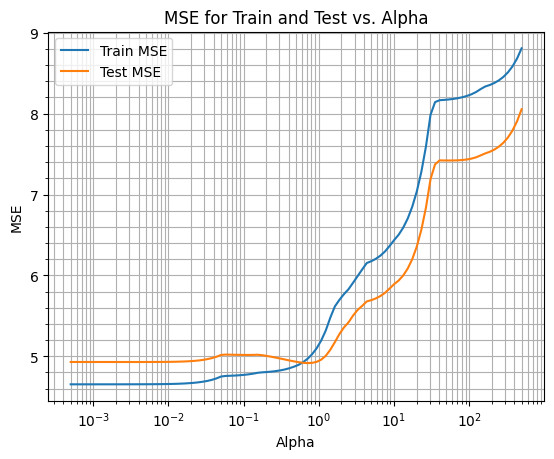

In [198]:
## Write your code here ##
# Plot MSE for train and test versus alpha
plt.plot(alphas, train_mse, label='Train MSE')
plt.plot(alphas, test_mse, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.title('MSE for Train and Test vs. Alpha')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()

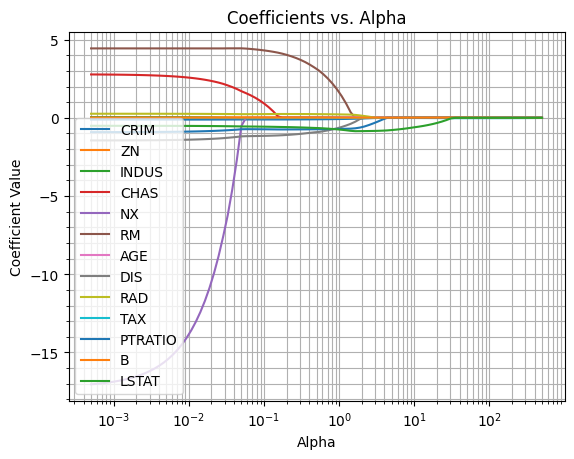

In [199]:
# Plot coefficients versus alpha
for i in range(np.shape(coefficients)[1]):
    coeff_i = []
    for j in range(np.shape(coefficients)[0]):
        coeff_i.append(coefficients[j][i])
    plt.plot(alphas, coeff_i,label=boston.columns[i])
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Alpha')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()
plt.show()

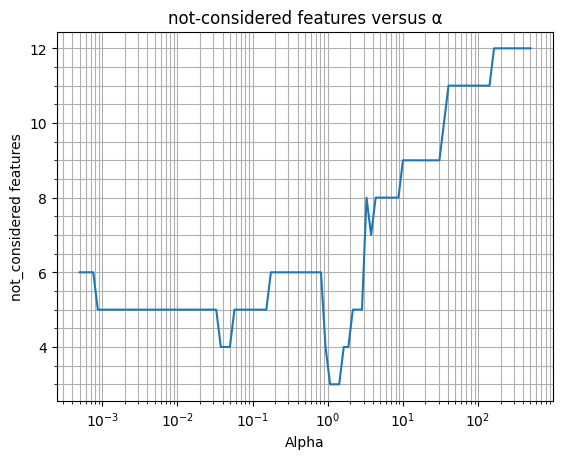

In [200]:
# Plot Number of not-considered features versus α
plt.plot(alphas, not_considered_features)
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('not_considered features')
plt.title('not-considered features versus α')
plt.grid(which='both')
plt.minorticks_on()

In [201]:
# Lasso with 5-fold cross-validation
lasso_cv = LassoCV(alphas=None, cv=5)

# Fit model
lasso_cv.fit(X_train, y_train)

# Show best value of penalization chosen by cross validation
print("Best value of penalization chosen by cross validation:", lasso_cv.alpha_)

Best value of penalization chosen by cross validation: 0.7112607795804332


In [202]:
model_opt = Lasso(alpha=lasso_cv.alpha_)
model_opt.fit(X_train, y_train)

print("Alpha_opt: ",lasso_cv.alpha_)
print()

# Calculate the R^2 score for the training and testing sets
train_score = model_opt.score(X_train, y_train)
test_score = model_opt.score(X_test, y_test)

# Calculate the RMSE for the training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, model_opt.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, model_opt.predict(X_test)))

# Print the R^2 scores and RMSE values
print("Training R^2 score: {:.2f}".format(train_score))
print("Testing R^2 score: {:.2f}".format(test_score))
print("Training RMSE: {:.2f}".format(train_rmse))
print("Testing RMSE: {:.2f}".format(test_rmse))
print()

# Print the coefficients
print("Model coefficients:")
for i in range(len(model_opt.coef_)):
   print(boston.columns[i],":","{:.3f}".format(model_opt.coef_[i]))
print("Intercept:", "{:.3f}".format(model_opt.intercept_))

Alpha_opt:  0.7112607795804332

Training R^2 score: 0.72
Testing R^2 score: 0.67
Training RMSE: 4.97
Testing RMSE: 4.91

Model coefficients:
CRIM : -0.086
ZN : 0.031
INDUS : -0.000
CHAS : 0.000
NX : -0.000
RM : 2.501
AGE : 0.006
DIS : -0.800
RAD : 0.229
TAX : -0.013
PTRATIO : -0.720
B : 0.012
LSTAT : -0.690
Intercept: 30.135


**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

In [232]:
## Write you code here
alphas_range = 10**np.linspace(3, -3, 100) * 0.5

# Define the range of training data ratios
ratios = np.arange(0.1, 1.0, 0.1)

# Initialize arrays to store the R^2 scores and alpha values
r2_scores = np.zeros((3, len(ratios)))
alphas = np.zeros((2, len(ratios)))

# Iterate over the ratios
for i, ratio in enumerate(ratios):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(boston.drop('MEDV', axis=1), boston['MEDV'], test_size=1 - ratio, random_state=42)

    # Fit the linear regression model
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    r2_scores[0, i] = linreg.score(X_test, y_test)

    # Fit the ridge regression model
    ridge = RidgeCV()
    ridge.fit(X_train, y_train)
    r2_scores[1, i] = ridge.score(X_test, y_test)
    alphas[0, i] = ridge.alpha_

    # Fit the lasso regression model
    lasso = LassoCV()
    lasso.fit(X_train, y_train)
    r2_scores[2, i] = lasso.score(X_test, y_test)
    alphas[1, i] = lasso.alpha_

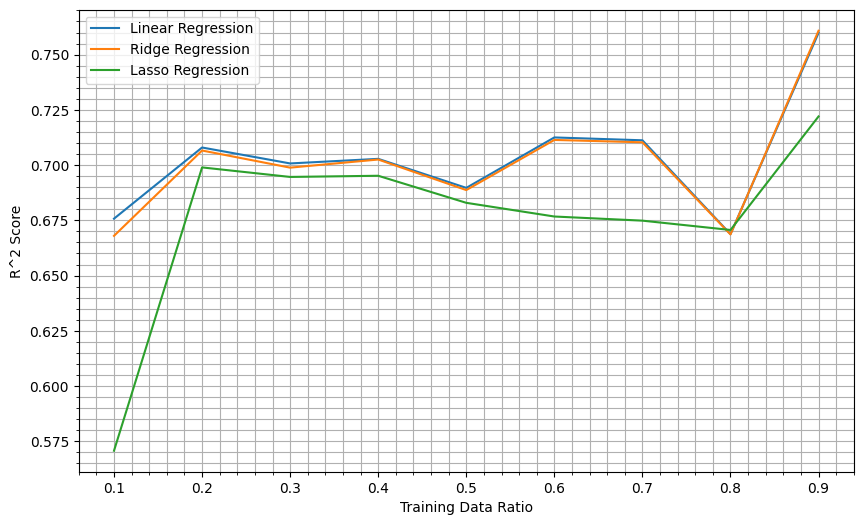

In [233]:
# Plot the R^2 scores
plt.figure(figsize=(10, 6))
plt.plot(ratios, r2_scores[0], label='Linear Regression')
plt.plot(ratios, r2_scores[1], label='Ridge Regression')
plt.plot(ratios, r2_scores[2], label='Lasso Regression')
plt.xlabel('Training Data Ratio')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()
plt.show()

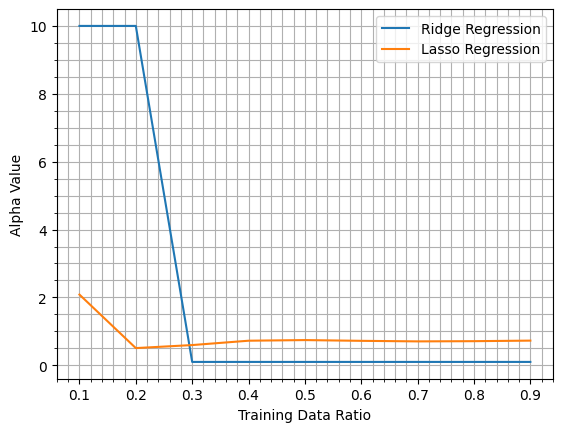

In [235]:
# Plot the alpha values
plt.plot(ratios, alphas[0], label='Ridge Regression')
plt.plot(ratios, alphas[1], label='Lasso Regression')
plt.xlabel('Training Data Ratio')
plt.ylabel('Alpha Value')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()
plt.show()

The overall behavior of the plots for $R^2$ for test data versus ratio of training data and selected α value versus training data ratio for ridge and lasso regression methods would show the impact of the regression methods in preventing overfitting.
The first plot of $R^2$ for test data versus ratio of training data would demonstrate the performance of the three methods (linear regression, ridge regression, and lasso regression) in fitting the data as the ratio of training data to the whole data is varied. The plot would show how the $R^2$ score varies with the ratio of training data, with a higher $R^2$ score indicating a better fit. The plot would also illustrate the trade-off between bias and variance, with a lower ratio of training data leading to a higher risk of overfitting and a higher ratio of training data leading to a higher risk of underfitting.
The second plot of selected α value versus training data ratio for ridge and lasso regression methods would show how the value of the regularization parameter α varies with the ratio of training data. The plot would demonstrate the impact of the regularization parameter on the model complexity and the bias-variance trade-off. A higher value of α would lead to a simpler model with a higher bias and a lower variance, while a lower value of α would lead to a more complex model with a lower bias and a higher variance.
By analyzing these plots, one can infer the optimal ratio of training data and the optimal value of the regularization parameter α for each regression method. The plots would provide insights into the performance of the regression methods in preventing overfitting and the trade-off between bias and variance. The plots would also highlight the importance of selecting the appropriate ratio of training data and the appropriate value of the regularization parameter for achieving the best possible performance.